# Prediction using Unsupervised ML

### Adding modules

In [12]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

print("All loaded!")

### Loading Data
Loading Data from student data.csv

In [2]:
df=pd.read_csv("Iris.csv")

### Exploring Data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Plotting data

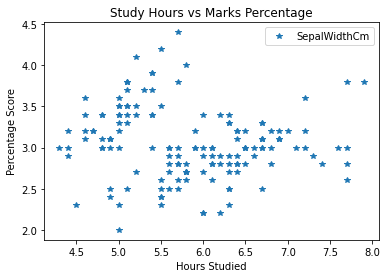

In [6]:
df.plot(x='SepalLengthCm', y='SepalWidthCm', style='*')  
plt.title('Study Hours vs Marks Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

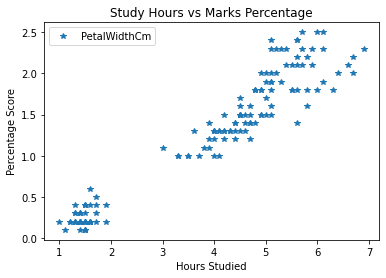

In [7]:
df.plot(x='PetalLengthCm', y='PetalWidthCm', style='*')  
plt.title('Study Hours vs Marks Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Processing

In [16]:
x = df.iloc[:, [0, 1, 2, 3]].values
data=df.copy()

In [10]:
for col in ['Species']:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [13]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

### Modeling

In [14]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

### Plotting to see the optimal number of clusters

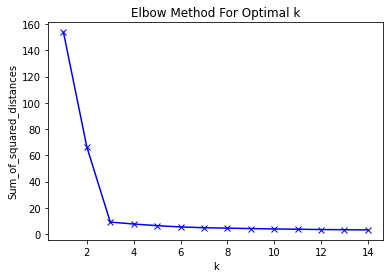

In [15]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Optimal cluster size > 3

### Applying the cluster size

In [19]:
final_model= KMeans(n_clusters=3)
predicted = final_model.fit_predict(x)

In [ ]:
### Plotting the ans

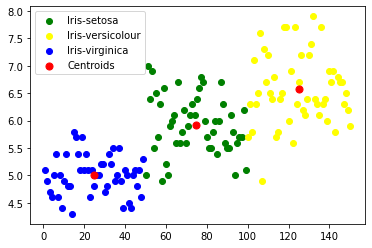

In [21]:
plt.scatter(x[predicted == 0, 0], x[predicted == 0, 1], c = 'green', label = 'Iris-setosa')
plt.scatter(x[predicted == 1, 0], x[predicted == 1, 1],c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[predicted == 2, 0], x[predicted == 2, 1], c = 'blue', label = 'Iris-virginica')

plt.scatter(final_model.cluster_centers_[:, 0], final_model.cluster_centers_[:,1],s = 50, c = 'red', label = 'Centroids')

plt.legend()
plt.show()